In [1]:
# Importing required libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy.stats import norm  # Used to calculate normal distribution

%matplotlib inline

In [3]:
# Create the distribution
data = np.arange(1, 10, 0.01)
pdf = norm.pdf(data, loc=5, scale=1)
# loc is our mean and scale is our standard deviation

Text(0, 0.5, 'Probability Density')

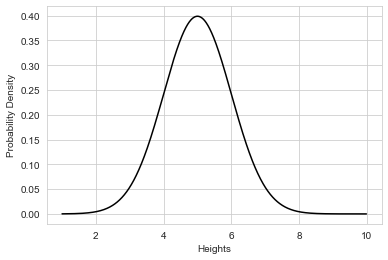

In [12]:
# Visualizing the distribution
sns.set_style("whitegrid")
sns.lineplot(x=data, y=pdf, color='black')
plt.xlabel('Heights')
plt.ylabel('Probability Density')

Now, if we were asked to pick one person randomly from this distribution, then what is the probability that the height of the person will be smaller than 4.5 ft. ?

In [14]:
x = norm(loc=5, scale=1).cdf(4.5)

In [18]:
print(f"The probability of selecting a person at random that is \
smaller than 4.5ft is {round(x,2)} or {round(x*100,2)}%")

The probability of selecting a person at random that is smaller than 4.5ft is 0.31 or 30.85%


In [21]:
# Visualizing the distribution
sns.set_style("whitegrid")
sns.lineplot(x=data, y=pdf, color='black')
plt.xlabel('Heights')
plt.ylabel('Probability Density')
plt.fill_between(0, 4.5, color='blue', alpha=0.5)

Now, what if we were asked about the probability that the height of a person chosen randomly will be above 6.5ft?

Now, again we were asked to pick one person randomly from this distribution, then what is the probability that the height of the person will be between 6.5 and 4.5 ft. ?

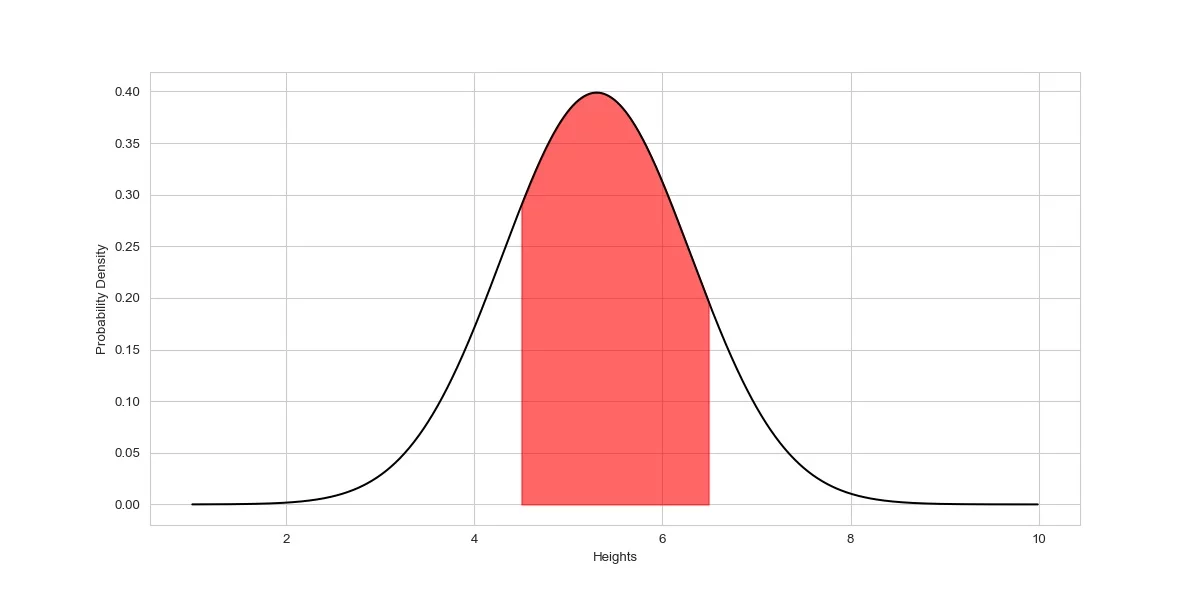

## Confidence Intervals using the Normal Distribution

Syntax: norm.interval(alpha, loc, scale)) 

Parameters:

* alpha: Probability that an RV will be drawn from the returned range.
* loc: location parameter
* scale: scale parameter

### Example

We will be using the random data set of size(n=100) and will be calculating the 90% confidence Intervals using the norm Distribution using the norm.interval() function and passing the alpha parameter to 0.90 in the python.

In [2]:
# Finding the standard error
from scipy.stats import sem

# define sample data
data = np.random.randint(40, 100, 100)

#create a 90% confidence interval
# for population mean weight for adults

norm.interval(alpha=0.90,
             loc=np.mean(data),
             scale=sem(data))

(68.71407047097438, 74.40592952902563)

### Hypothesis Testing

Many frequentist methods for hypothesis testing roughly involve the following steps:

1.  Writing down the hypotheses, notably the null hypothesis, which is the opposite of the hypothesis we want to prove (with a certain degree of confidence). 
2.  Computing a test statistic, a mathematical formula depending on the test type, the model, the hypotheses, and the data. 
3.  Using the computed value to reject the hypothesis with a given level of uncertainty, or fail to conclude (and, consequently, accept the hypothesis until future studies reject it).

For example, to test the efficacy of a new drug, doctors may consider, as a null hypothesis, that the drug has no statistically significant effect on a group of patients compared to a control group of patients who do not take the drug. If studies reject the null hypothesis, it is an argument in favor of the efficacy of the drug (but it is not a definite proof).

Here, we flip a coin n
 times and we observe h
 heads. We want to know whether the coin is fair (null hypothesis). This example is particularly simple yet quite useful for pedagogical (educational) purposes. Besides, it is the basis of many more complex methods.

We denote the Bernoulli distribution by B(q)
 with the unknown parameter q
. You can refer to https://en.wikipedia.org/wiki/Bernoulli_distribution for more information.

A Bernoulli variable is:

* 0 (tail) with probability 1−q
* 1 (head) with probability q


Here are the steps required to conduct a simple statistical z-test:

1.  Let's suppose that after n=100
 flips, we get h=61
 heads. We choose a significance level of 0.05: is the coin fair or not? Our null hypothesis is: the coin is fair (q=1/2
). We set these variables:

In [4]:
import scipy.stats as st

In [5]:
n = 100 # number of coin flips
x = 61 # number of heads (successes)
p = 0.5 # null hypothesis of fair coin

2.  Let's compute the z-score, which is defined by the following formula (xbar is the estimated average of the distribution). We will explain this formula in the next section, How it works...

In [6]:
xbar = x/n

In [7]:
se = np.sqrt((p*(1-p))/n)

In [8]:
se

0.05

In [12]:
z = (xbar-p)/se
z = round(z, 4) # round to 4 decimal places
z

2.2

3.  Now, from the z-score, we can compute the p-value as follows:

In [14]:
pval =2* (1 - st.norm.cdf(z))
pval

0.02780689502699718

4.  This p-value is less than 0.05, so we reject the null hypothesis and conclude that the coin is probably not fair.